<a href="https://colab.research.google.com/github/i3rvn0/Desafio_Indicium_IMDB/blob/main/Desafio_indicium_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio imdb

> ### 1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas.

In [1]:
import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=1JUTYnugqoG_Dek-yLedjbpIHY1iJh7Ex'

dados_imdb = pd.read_csv(url)

dados_imdb.info() # Os dados aqui apresentados revelam o quantitativo de valores não-nulos em cada coluna, além do tipo de dados inseridos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


>> Com base nos dados acima, é possível visualizar o quantitativo de dados por coluna, onde são apenas evidenciados os dados "não-nulos",  e seus respectivos tipos de dados.

In [2]:
dados_imdb['Certificate'].unique() # Aqui são apresentados o conjunto de valores que foram inseridos na coluna "Certificate", onde podemos evidenciar os de tipo "nan"
# Porém não serão utilizados nos cálculos do projeto.

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [29]:
dados_imdb['IMDB_Rating'].unique() # Aqui são apresentados o conjunto de valores que foram inseridos na coluna "IMDB_Rating", onde podemos evidenciar que há apenas valores inteiros acima de 7.6

array([9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. , 7.9,
       7.8, 7.7, 7.6])

In [3]:
dados_imdb

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


>> Com base na tabela apresentada, e considerando que o conceito de avaliação de IMDB (IMDB_rating), que pode já por regra não considerar valores outliers e valores provenientes de contas falsas para "inflar" a avaliação de um filme,

> ### 2. Responda também às seguintes perguntas:

>> a) Qual filme você recomendaria para uma pessoa que você não conhece?

>>> Resposta: Recomendaria um filme de maior avaliação conforme o tipo de gênero que a pessoa tem preferência.

>> b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

>>> Resposta: os valores nas colunas "IMDB_rating" e "Meta_score" discriminam a votação e avaliação dos filmes, sendo valores consideráveis importantes para uma alta expectativa de faturamento. Outros fatores relevantes são a continuação de um filme bem avaliado e os atores protagonistas e participantes.

>> c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

>>> Resposta: Sim, é possível, porém seria preciso criar modelos com palavras-chave para classificar e limitar o Gênero a 3 por exemplo, a fim de evitar muitas classificações de um filme.


In [4]:
# Aqui são apresentados os dados para melhor visualização apenas com as 3 colunas "Series_Title", "Genre" e "Overview",
# para evidenciar a classificação do filme na coluna "Genre" com a coluna relacionada "Overview"
pd.set_option('display.max_colwidth', None)
dados_imdb[['Series_Title', 'Genre', 'Overview']]

,Series_Title,Genre,Overview
0,The Godfather,"Crime, Drama",An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
1,The Dark Knight,"Action, Crime, Drama","When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice."
2,The Godfather: Part II,"Crime, Drama","The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate."
3,12 Angry Men,"Crime, Drama",A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.
4,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.
...,...,...,...
994,Breakfast at Tiffany's,"Comedy, Drama, Romance","A young New York socialite becomes interested in a young man who has moved into her apartment building, but her past threatens to get in the way."
995,Giant,"Drama, Western",Sprawling epic covering the life of a Texas cattle rancher and his family and associates.
996,From Here to Eternity,"Drama, Romance, War","In Hawaii in 1941, a private is cruelly punished for not boxing on his unit's team, while his captain's wife and second-in-command are falling in love."
997,Lifeboat,"Drama, War",Several survivors of a torpedoed merchant ship in World War II find themselves in the same lifeboat with one of the crew members of the U-boat that sank their ship.


> ## 3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


>> Resposta: Primeiro, é apresentada a Matriz de Correlação dos valores de "Meta_score", "No_of_Votes", "Gross" e "IMDB_Rating", onde podemos perceber as relações com "IMDB_Rating":

>> - "No_of_Votes" apresenta a correlação positiva mais forte (0,479).
>> - "Meta_score" tem correlação positiva (0,271).
>> - "Gross" apresenta correlação positiva muito fraca (0,093).

>>> OBS.: Foi usada a coluna "No_of_Votes" pois se apresentou como o fator mais influente entre as colunas analisadas para prever "IMDB_Rating" no tópico 4.

In [28]:
import pandas as pd

# Transformando os valores da coluna "Gross" no DataFrame "dados_imdb" para criar a Matriz de Correlação
dados_imdb['Gross'] = dados_imdb['Gross'].astype(str).str.replace(',', '', regex=False)
dados_imdb['Gross'] = pd.to_numeric(dados_imdb['Gross'], errors='coerce')
dados_imdb['Gross'].fillna(dados_imdb['Gross'].mean())

# Gerando a Matriz de Correlação com base nos valores de "Meta_score", "No_of_Votes", "Gross" e "IMDB_Rating"
correlation_matrix = dados_imdb[['Meta_score', 'No_of_Votes', 'Gross', 'IMDB_Rating']].corr()
correlation_matrix

,Meta_score,No_of_Votes,Gross,IMDB_Rating
Meta_score,1.000000,-0.020091,-0.031403,0.271374
No_of_Votes,-0.020091,1.000000,0.563484,0.479308
Gross,-0.031403,0.563484,1.000000,0.092968
IMDB_Rating,0.271374,0.479308,0.092968,1.000000


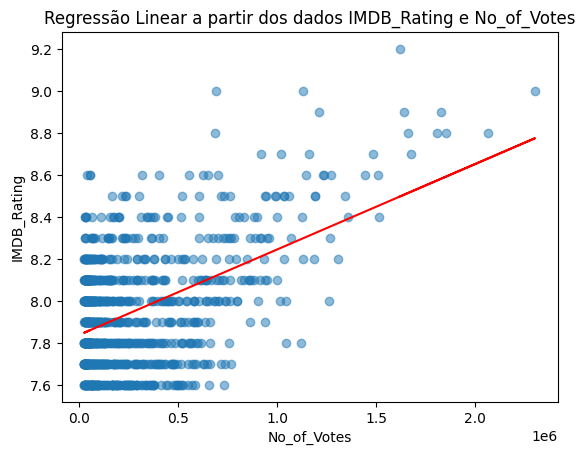


>>> Aqui temos a criação do modelo com base no modelo criado a partir dos dados de IMDB_rating e No_of_Votes da tabela "dados_imdb".

>>> A partir do modelo criado, podemos calcular a predição de um filme, conforme tópico 4 a seguir.


In [19]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = dados_imdb[['No_of_Votes']]
y = dados_imdb['IMDB_Rating']

model = LinearRegression()

model.fit(X, y)

plt.scatter(X, y, alpha=0.5) # Plotando os pontos no gráfico com base nos dados de X e y

plt.plot(X, model.predict(X), color='red') # Plotando a reta de regressão

# Rotulando os dados usados no gráfico e inserindo título
plt.xlabel('No_of_Votes')
plt.ylabel('IMDB_Rating')
plt.title('Regressão Linear a partir dos dados IMDB_Rating e No_of_Votes')

plt.show()



print('\n> Aqui temos a criação do modelo com base no modelo criado a partir dos dados de IMDB_Rating e No_of_Votes da tabela "dados_imdb".')

print('\n>> Foi escolhida a Regressão Linear .')

print('\n>>> A partir do modelo criado, podemos calcular a predição de um filme, conforme tópico 4 a seguir.')

> ## 4. Supondo um filme com as seguintes características:

>> {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


>> ## Qual seria a nota do IMDB?

>>> Resposta: apenas considerando os dados das colunas "Meta_score", "No_of_Votes" e "Gross" não seria possível obter uma avaliação de IMDB. Para isso, foi utilizado no modelo abaixo, com base nos dados da fonte com o catálogo de filmes, que no projeto, foi nomeado como "dados_imdb".

>>> Confome cálculo abaixo, teremos uma predição de 8.79 para a avaliação IMDB do filme "The Shawshank Redemption".


In [18]:
import pandas as pd

filme_ex_4 = [
 {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}
]

filme_ex_4_df = pd.DataFrame(filme_ex_4) # Convertendo o dicionário em DataFrame

predicao_imdb_rating = model.predict(filme_ex_4_df[['No_of_Votes']]) # Calculando a predição com base no modelo criado a partir dos dados de IMDB_rating e No_of_Votes da tabela "dados_imdb"
print(f'A predição da avaliação IMDB para o filme "The Shawshank Redemption" é de {predicao_imdb_rating[0]:.2f}.')

A predição da avaliação IMDB para o filme "The Shawshank Redemption" é de 8.79.


>> Finalizando: salvar o modelo desenvolvido como um arquivo .pkl

In [35]:
import pickle

# Salvando o modelo criado como um arquivo Pickle:
with open("imdb_rating_model.pkl", "wb") as f:
    pickle.dump(model, f)

print('Modelo salvo como "imdb_rating_model.pkl"')

Modelo salvo como "imdb_rating_model.pkl"
